# Exploring Principal Component Analysis (PCA)



##  Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the datasets

In [68]:
from keras.datasets import mnist # MNIST dataset is included in Keras

### Splitting the data into train and test set

In [69]:
# The MNIST data is split between 60,000 training images and 10,000 test image
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


### Display Sample Data

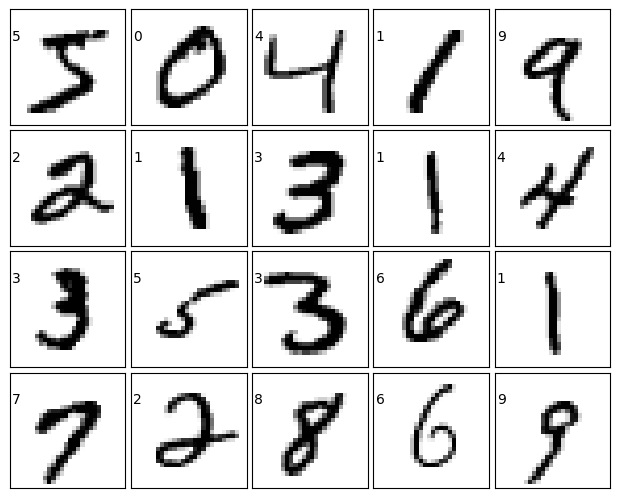

In [4]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

### Reshaping the dataset

In [5]:
# Reshaping the dataset
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)  

# Change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


### Standardizing the data

In [6]:
# Apply standarization to both train and test data
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

##  PCA on MNIST Digit Recognition

Step 0 : Import the PCA model from the sklearn library and do dimentional reduction on the data

In [7]:
# initializing the pca
from sklearn.decomposition import PCA

Fit the PCA on the training set and set the model to retain 95% of the variance

In [8]:
pca = PCA(n_components=.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [9]:
print(f'Total number of components used after PCA : {pca.n_components_}')

Total number of components used after PCA : 331


Apply the mapping to the training & test set of data

In [10]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f'train_img shape : {train_img.shape}')
print(f'test_img shape : {test_img.shape}')

train_img shape : (60000, 331)
test_img shape : (10000, 331)


In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
y_train.reshape(-1,1).shape

(60000, 1)

In [19]:
train_img.shape

(60000, 331)

In [22]:
data=np.concatenate((train_img,y_train.reshape(-1,1)),axis=1)


In [23]:
data.shape

(60000, 332)

In [24]:
df=pd.DataFrame(data)

In [52]:
new_df=pd.concat([df.iloc[:,0],df.iloc[:,1], df[331]], axis=1)

In [53]:
new_df.columns = ["1st_principal", "2nd_principal", "label"]

C:\Users\samui\anaconda3\envs\ece715_projects\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


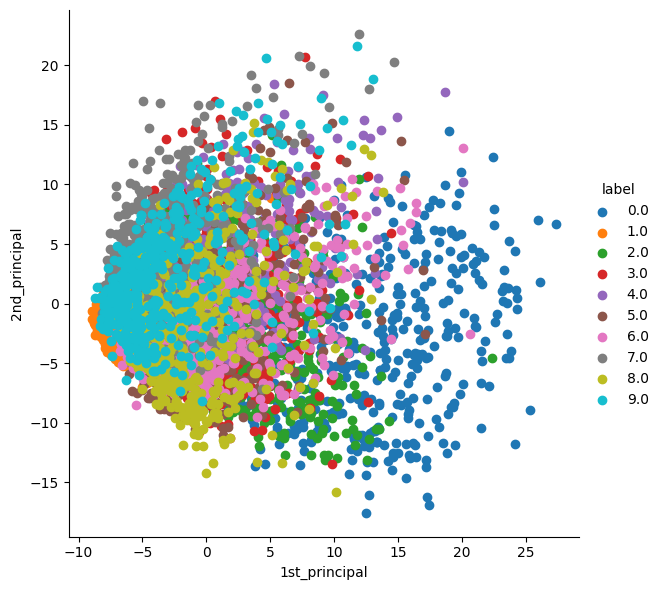

In [67]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(new_df.iloc[:5000,:], hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

##  Train the Multilayer Neural Network model

For this task, I'm going to use the **Multi Layered Perceptron** model

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
clf = MLPClassifier(solver = 'lbfgs')

In [13]:
clf.fit(train_img, y_train)

MLPClassifier(solver='lbfgs')

In [14]:
print('Training score : ', clf.score(train_img, y_train))
print('Testing score  : ', clf.score(test_img, y_test))

Training score :  1.0
Testing score  :  0.9728


##  Experiment

Now let's experiment with using multiple dimension input and see which 
PCA settings is the most optimal for reducing fit times while retaining high accuracy

In [15]:
# The data used is the original train and test data
X_train.shape

(60000, 784)

#### Prepare the data

Let's try to reduce the data dimension while retaining **85%, 90%, 95%, and 99%** of the variance

In [16]:
from sklearn.decomposition import PCA
list_variance = [.85, .90, .95, .99]
train_data = []
test_data = []
i = 0

for variance in list_variance:
  print(f'Dataset dimensional reduction with {variance*100}% variance retained')
  print('='*60)

  pca = PCA(n_components=variance)
  pca.fit(X_train)

  train_data.append(pca.transform(X_train))
  test_data.append(pca.transform(X_test))

  print(f'> Total number of components for variance {variance} : {pca.n_components_}')
  print(f'> Train data shape : {train_data[i].shape}')
  print(f'> Test data shape  : {test_data[i].shape}\n')
  i += 1

Dataset dimensional reduction with 85.0% variance retained
> Total number of components for variance 0.85 : 185
> Train data shape : (60000, 185)
> Test data shape  : (10000, 185)

Dataset dimensional reduction with 90.0% variance retained
> Total number of components for variance 0.9 : 236
> Train data shape : (60000, 236)
> Test data shape  : (10000, 236)

Dataset dimensional reduction with 95.0% variance retained
> Total number of components for variance 0.95 : 331
> Train data shape : (60000, 331)
> Test data shape  : (10000, 331)

Dataset dimensional reduction with 99.0% variance retained
> Total number of components for variance 0.99 : 543
> Train data shape : (60000, 543)
> Test data shape  : (10000, 543)



#### Base-line Result 

Control result is the accuracy and train time that is taken by the model using the original data without dimentional reduction



In [17]:
from sklearn.neural_network import MLPClassifier
import time
import warnings
warnings.filterwarnings("ignore")

In [18]:
start_time = time.time()
clf = MLPClassifier(solver = 'lbfgs', max_iter=100)
clf.fit(X_train, y_train)
end_time = time.time()

print(f'Control result with original dataset (100% variance)')
print('='*60)
print(f'Training score : ', clf.score(X_train, y_train))
print(f'Testing score  : ', clf.score(X_test, y_test))
print(f'Time (seconds) : {end_time - start_time} \n')

Control result with original dataset (100% variance)
Training score :  1.0
Testing score  :  0.9718
Time (seconds) : 83.31805324554443 



#### Testing

Independent variables : Data variance

Dependent variables : Training score, Testing score, Train time

In [19]:
for i in range(0, 4):
  start_time = time.time()
  clf = MLPClassifier(solver = 'lbfgs', max_iter=100)
  clf.fit(train_data[i], y_train)
  end_time = time.time()

  print(f'Dataset with {list_variance[i]*100}% variance retained')
  print('='*40)
  print(f'Training score : ', clf.score(train_data[i], y_train))
  print(f'Testing score  : ', clf.score(test_data[i], y_test))
  print(f'Time (seconds) : {end_time - start_time} \n')

Dataset with 85.0% variance retained
Training score :  1.0
Testing score  :  0.9729
Time (seconds) : 57.92865324020386 

Dataset with 90.0% variance retained
Training score :  1.0
Testing score  :  0.9736
Time (seconds) : 62.24691963195801 

Dataset with 95.0% variance retained
Training score :  1.0
Testing score  :  0.972
Time (seconds) : 68.37858891487122 

Dataset with 99.0% variance retained
Training score :  1.0
Testing score  :  0.9722
Time (seconds) : 77.46812129020691 



## Result Analysis

In [22]:
# Calculate component reduction percentage

components = [185, 236, 331, 543, 784]
components_reduction = []

for cc in components:
  z = (1.0 - (cc / 784)) * 100
  z = round(z, 2)
  components_reduction.append(z)

components_reduction

[76.4, 69.9, 57.78, 30.74, 0.0]

In [23]:
# Calculate training time reduction percentage

train_time = [43.96, 49.2, 54.9,64.47, 76.19]
train_time_reduction = []

for time in train_time:
  reduction = (1.0 - (time / 76.19)) * 100
  reduction = round(reduction, 2)
  train_time_reduction.append(reduction)

train_time_reduction

[42.3, 35.42, 27.94, 15.38, 0.0]

In [24]:
# Calculate accuracy difference

accuracy = [0.9722, 0.9744, 0.9733, 0.9735, 0.9744]
accuracy_diff = []

for acc in accuracy:
  x = 0.9744 - acc
  x = round(x, 4)
  accuracy_diff.append(x)

accuracy_diff

[0.0022, 0.0, 0.0011, 0.0009, 0.0]

In [25]:
result = {'Data Variance' : ['85%', '90%', '95%', '99%', '100%'], 
          'Components' : components,
          'Components Reduction (%)' : components_reduction,
          'Accuracy' : accuracy,
          'Accuracy Difference' : accuracy_diff,
          'Train Time': train_time,
          'Train time Reduction (%)' : train_time_reduction,
          }
res_df = pd.DataFrame(result)
res_df

,Data Variance,Components,Components Reduction (%),Accuracy,Accuracy Difference,Train Time,Train time Reduction (%)
0,85%,185,76.40,0.9722,0.0022,43.96,42.30
1,90%,236,69.90,0.9744,0.0000,49.20,35.42
2,95%,331,57.78,0.9733,0.0011,54.90,27.94
3,99%,543,30.74,0.9735,0.0009,64.47,15.38
4,100%,784,0.00,0.9744,0.0000,76.19,0.00


## Conclusion

From our experiment, the settings which produce the highest score is 
> **PCA while maintaining 90% of data variance**


This approach has reduce 

* 35.42% of the training time
* 69.9% of the components

while maintaining the **same accuracy score**